In [271]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [272]:
#loanding the dataset
fuel = pd.read_csv('fuel_consumption.csv')


In [273]:
#checking for the first five rows

fuel.head()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [274]:
#checking for the last five rows
fuel.tail()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [275]:
#checking for the dataset size
fuel.shape

(1067, 13)

In [276]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_year                 1067 non-null   int64  
 1   make                       1067 non-null   object 
 2   model                      1067 non-null   object 
 3   vehicle_class              1067 non-null   object 
 4   engine_size                1067 non-null   float64
 5   cylinders                  1067 non-null   int64  
 6   transmission               1067 non-null   object 
 7   fuel_type                  1067 non-null   object 
 8   fuel_consumption_city      1067 non-null   float64
 9   fuel_consumption_hwy       1067 non-null   float64
 10  fuel_consumption_comb      1067 non-null   float64
 11  fuel_consumption_comb_mpg  1067 non-null   int64  
 12  co2_emissions              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage:

In [277]:
# List the columns in fuel
fuel.columns

Index(['model_year', 'make', 'model', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [278]:
# Check for missing values in the entire DataFrame
missing_values_total = fuel.isna().sum()
print("Missing Values Total:")
print(missing_values_total)

Missing Values Total:
model_year                   0
make                         0
model                        0
vehicle_class                0
engine_size                  0
cylinders                    0
transmission                 0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
co2_emissions                0
dtype: int64


Alternatively we can use the mean to check for missing values

In [279]:
# Check for missing values in the entire DataFrame
missing_values_mean = fuel.isna().mean()
print("Missing Values Total:")
missing_values_mean

Missing Values Total:


model_year                   0.0
make                         0.0
model                        0.0
vehicle_class                0.0
engine_size                  0.0
cylinders                    0.0
transmission                 0.0
fuel_type                    0.0
fuel_consumption_city        0.0
fuel_consumption_hwy         0.0
fuel_consumption_comb        0.0
fuel_consumption_comb_mpg    0.0
co2_emissions                0.0
dtype: float64

Observation: Dataframe has no missing values.

In [280]:
# Get the unique number car makes
num_make = fuel['make'].nunique()
num_make

39

In [281]:
num_make = fuel['model'].nunique()
num_make

663

In [282]:
num_make = fuel['model_year'].nunique()
num_make

1

In [283]:
num_make = fuel['vehicle_class'].nunique()
num_make

16

#### continous datatype


In [284]:
continous_data = fuel.select_dtypes(exclude='object')
continous_data.head(7)



,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230
6,2014,3.5,6,11.8,8.1,10.1,28,232


Alternatively

In [285]:
#continous datatype
cdf = fuel[['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
cdf.head(7)

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232


### Descriptive Statistics 

In [286]:
descriptive_stats = continous_data.describe()
descriptive_stats

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Note:
- for continous datatype, we can drop model_year column

In [287]:
# new_continous_data =

In [288]:
descriptive_stats = cdf.describe()
descriptive_stats

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [289]:
fuel.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


### categorical data

In [290]:
categorical_data = fuel.select_dtypes(include='object')
categorical_data.head(7)

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
5,ACURA,RLX,MID-SIZE,AS6,Z
6,ACURA,TL,MID-SIZE,AS6,Z


In [291]:
import matplotlib.pyplot as plt

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 10))
    fig.suptitle('Bar charts of: ' + ', '.join(colsToPlot))

    for plotNumber, colName in enumerate(colsToPlot):
        ax = subPlot[plotNumber]
        data = inpData.groupby(colName).size().reset_index(name='count')
        data.plot(kind='bar', x=colName, y='count', ax=ax, legend=False)
        ax.set_title(colName)
        ax.set_xlabel(colName)
        ax.set_ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()


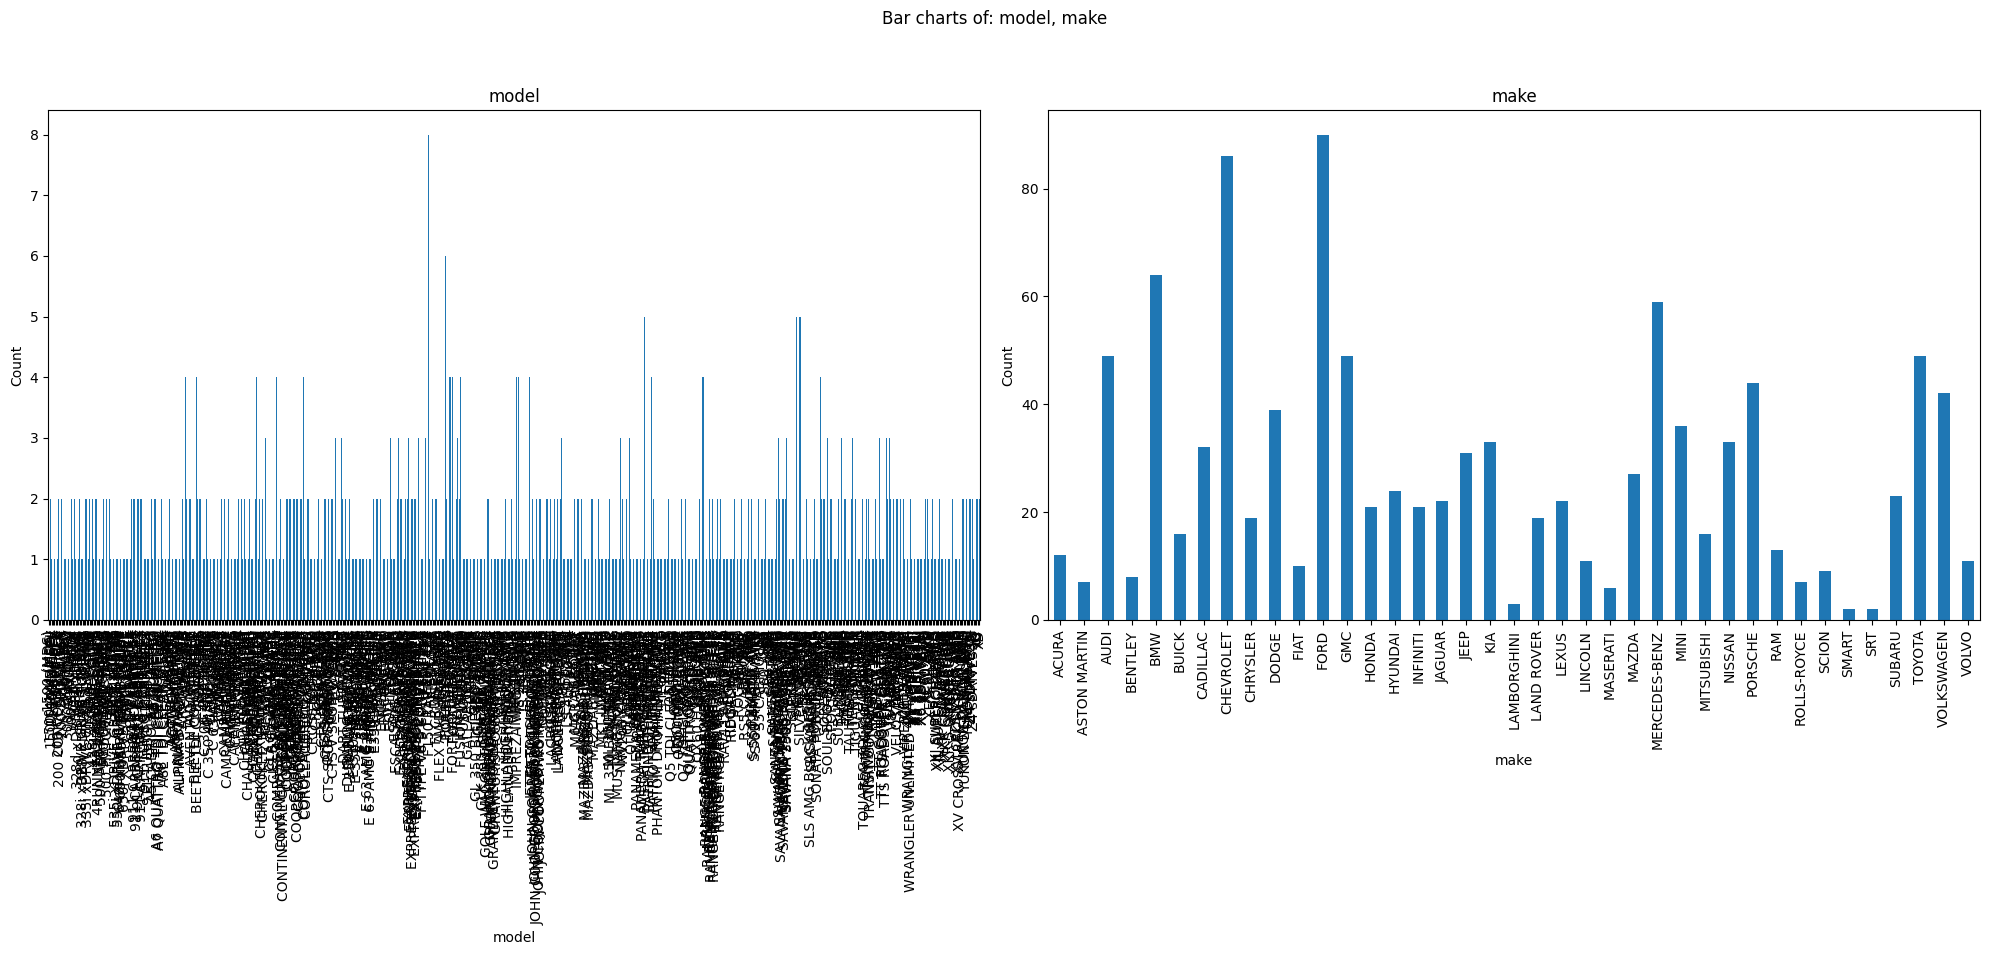

In [292]:
PlotBarCharts(inpData=fuel, colsToPlot=['model', 'make'])

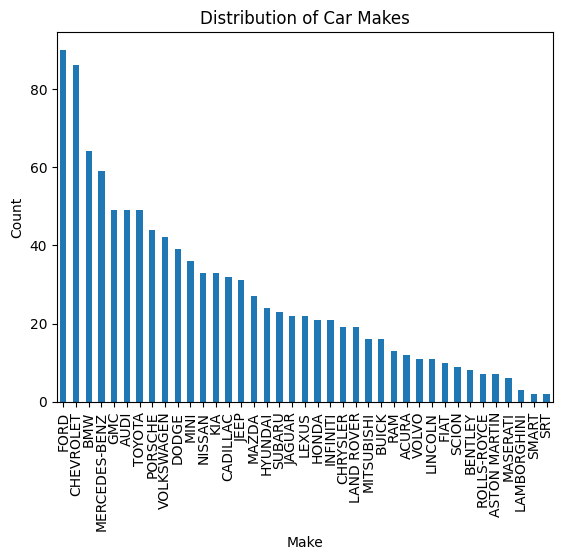

In [293]:

# Count the occurrences of each make
make_counts = fuel['make'].value_counts()

# Plot a bar chart of the makes
figsize=(50, 20)
make_counts.plot.bar()
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels and adjust font size
plt.show()


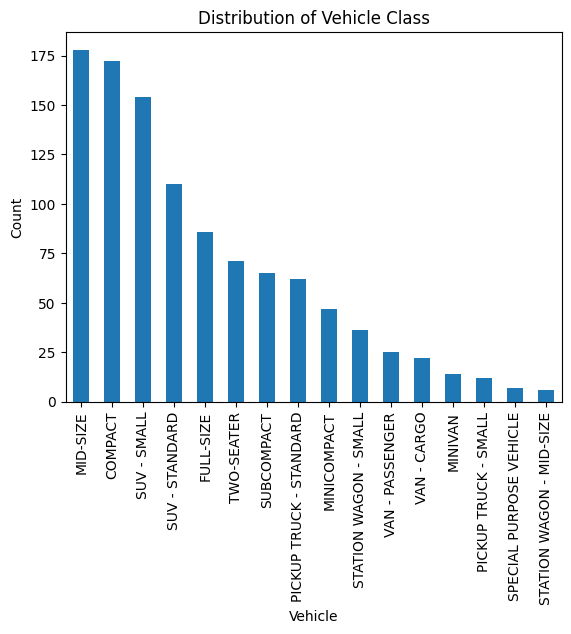

In [294]:
vehicle_counts = fuel['vehicle_class'].value_counts()

vehicle_counts.plot.bar()
plt.xlabel('Vehicle')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.xticks(rotation=90)
plt.show()

### Exploration on the continuous data

In [295]:
### continous data
continous_data = fuel.select_dtypes(exclude='object') 

cd = fuel.select_dtypes(include= ['int64','float64'])


In [296]:
continous_data.head(7)

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230
6,2014,3.5,6,11.8,8.1,10.1,28,232


In [297]:
continous_data.columns

Index(['model_year', 'engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [298]:
continous_columns = continous_data.columns

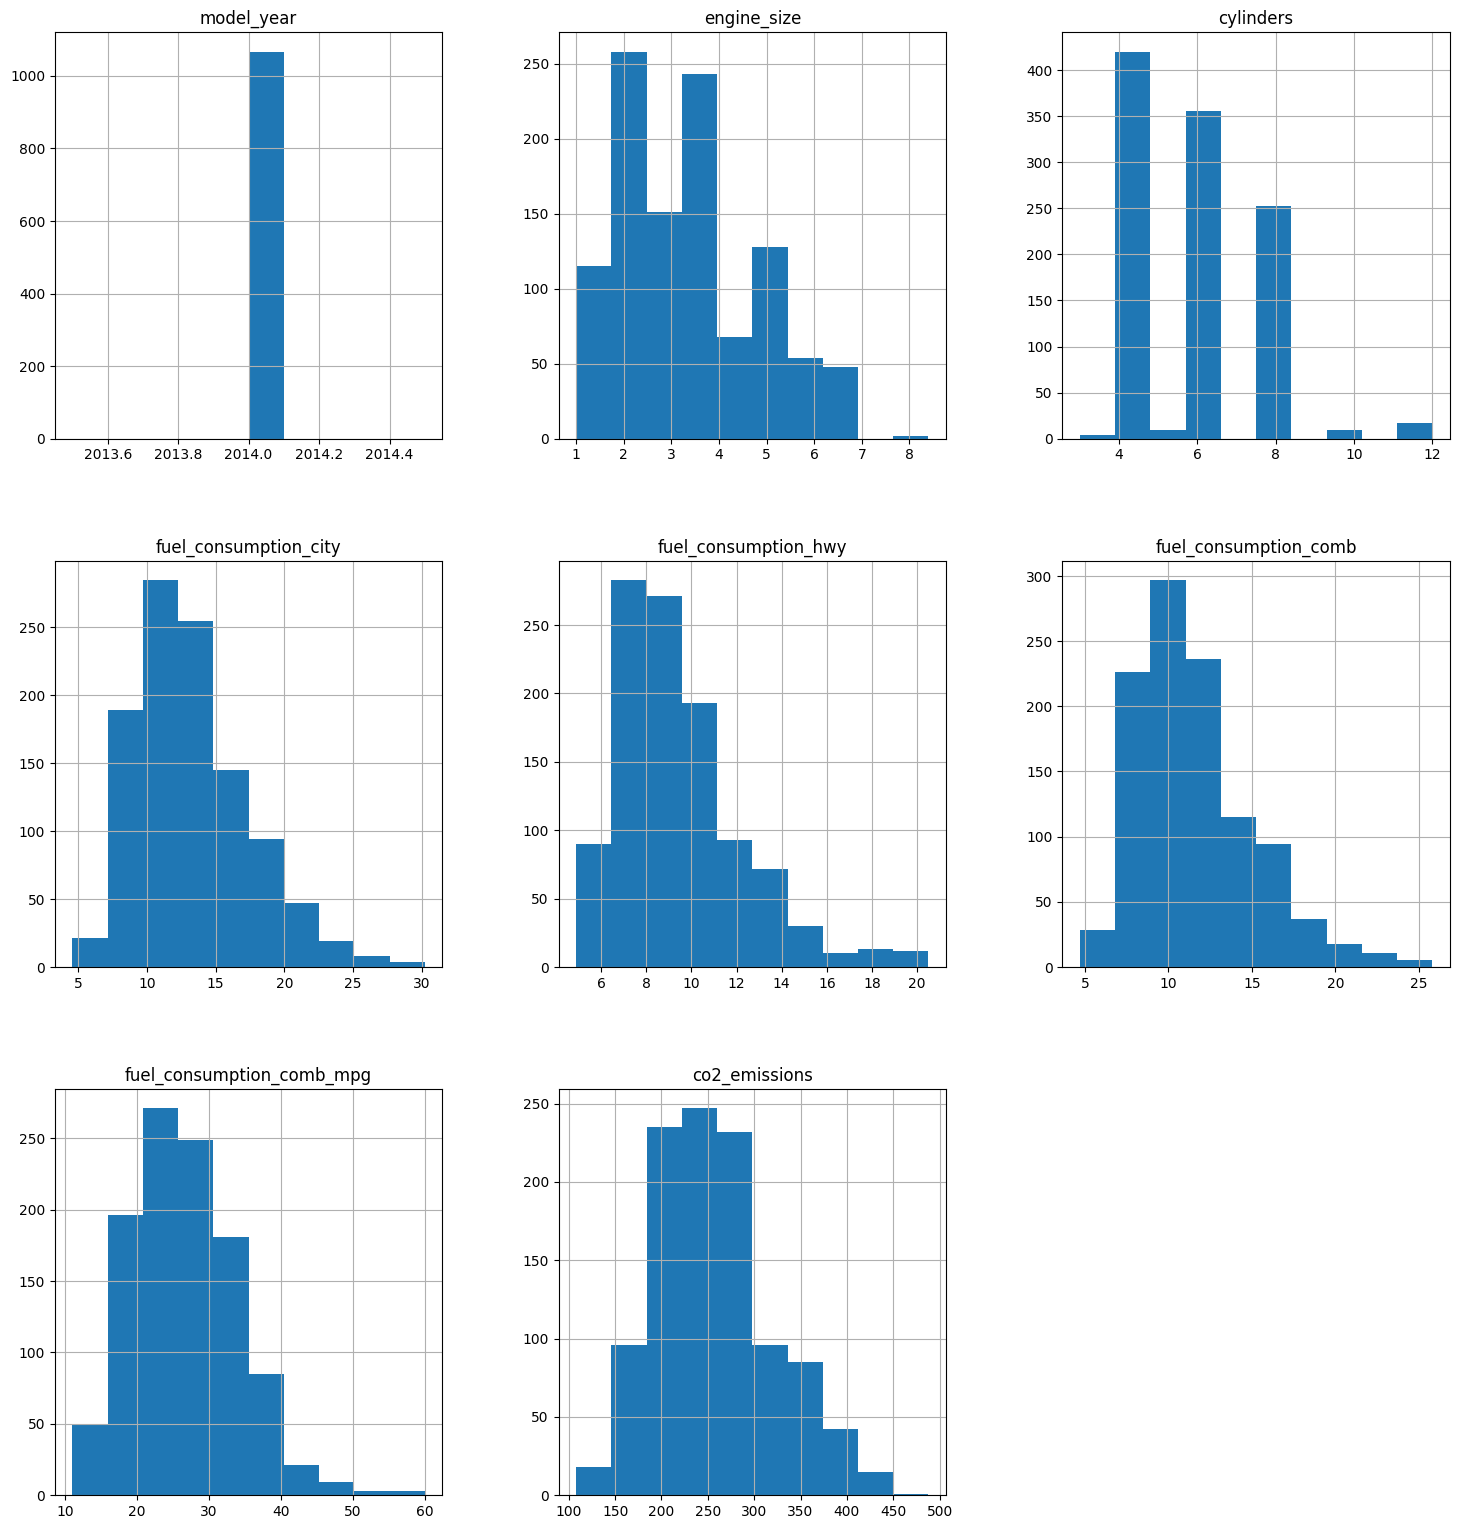

In [299]:
fuel.hist(continous_columns, figsize=(18,19))
plt.show()

Alternatively

In [300]:
numeric_columns = ['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']

### Histograms for the continuous data

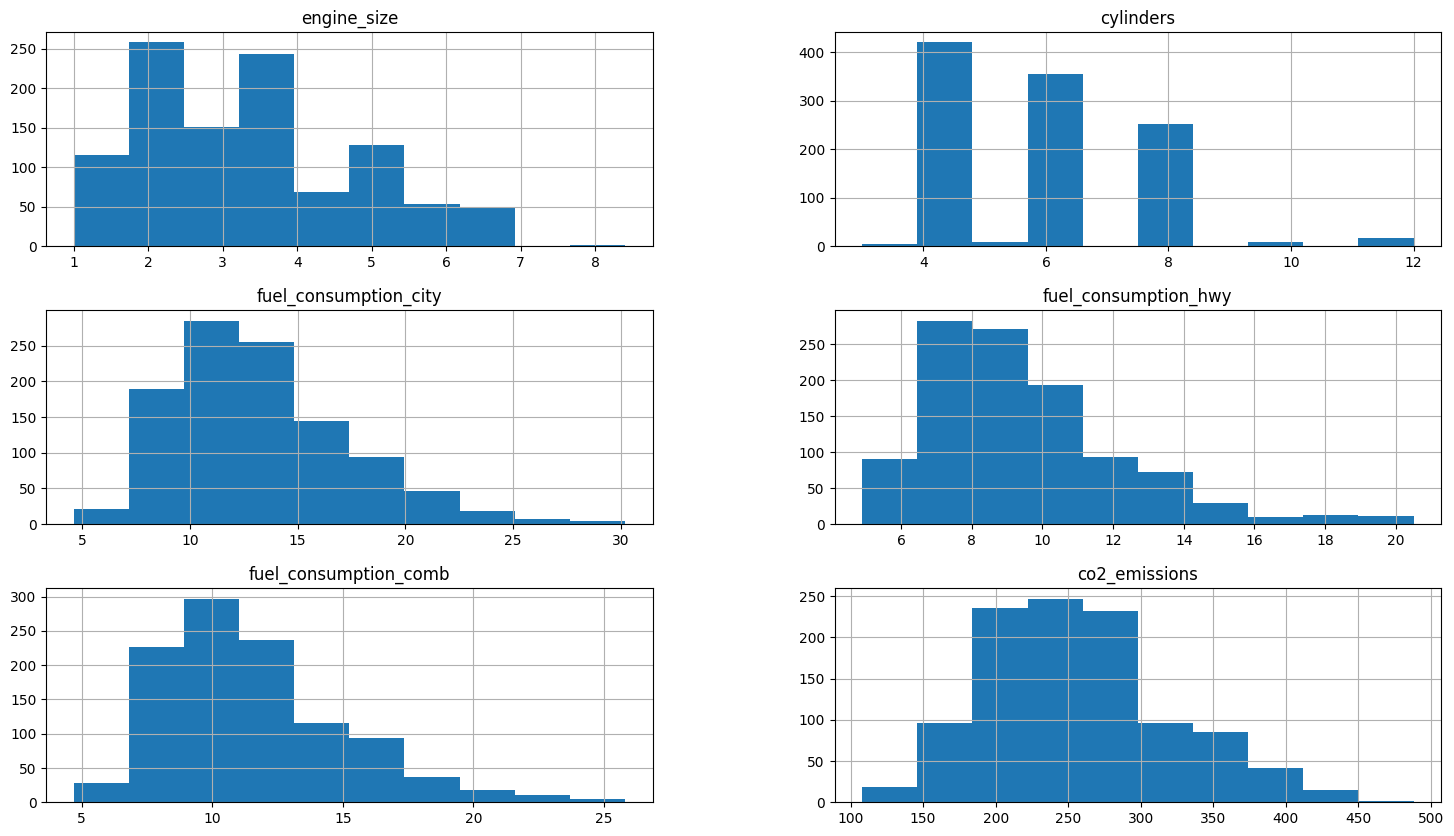

In [301]:
fuel.hist(numeric_columns, figsize=(18,10))
plt.show()

None is normally distributed.

Only cylinders have no outliers.

In [302]:
fuel.head(6)

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


# Vehicle Class and Make Analysis

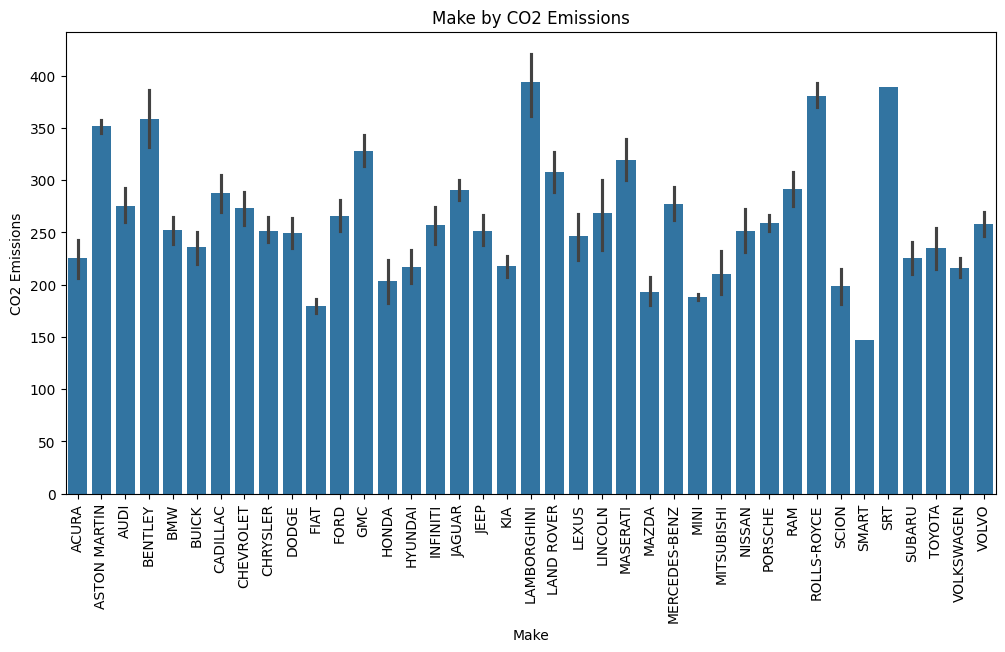

In [303]:
# Geographical Analysis: Plotting a bar chart of emissions by make
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='make', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('CO2 Emissions')
plt.title('Make by CO2 Emissions')
plt.show()

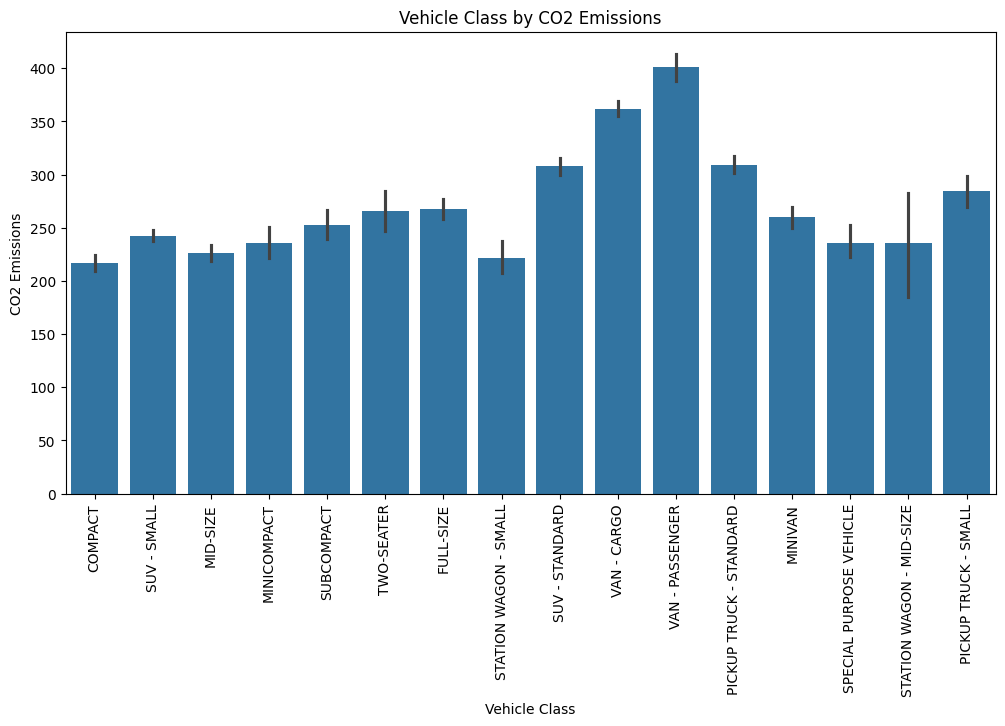

In [304]:
# Geographical Analysis: Plotting a bar chart of emissions by vehicle class
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='vehicle_class', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')
plt.title('Vehicle Class by CO2 Emissions')
plt.show()

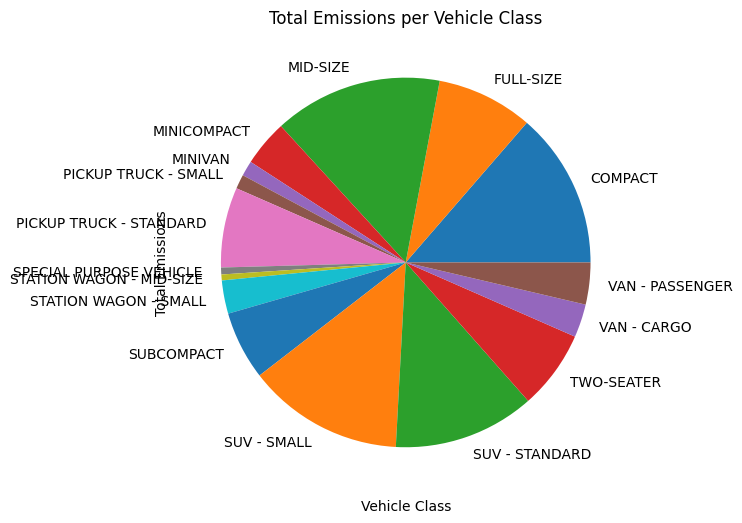

In [305]:
# Calculate total emisisons by vehicle class
total_emissions_per_class = fuel.groupby('vehicle_class')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Vehicle Class')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Vehicle Class')
plt.xticks(rotation=90)
plt.show()

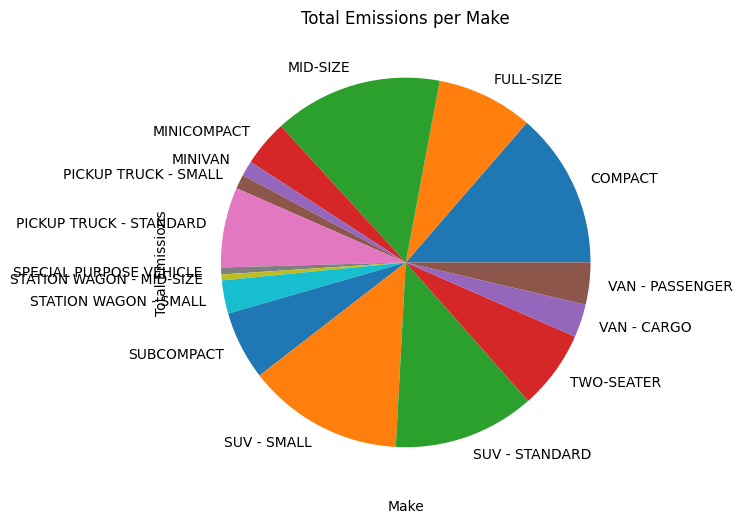

In [306]:
# Calculate total emisisons by make
total_emissions_per_make = fuel.groupby('make')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Make')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Make')
plt.xticks(rotation=45)
plt.show()

#### Pie chart is not an efficient communication option

## Checking for Outliers

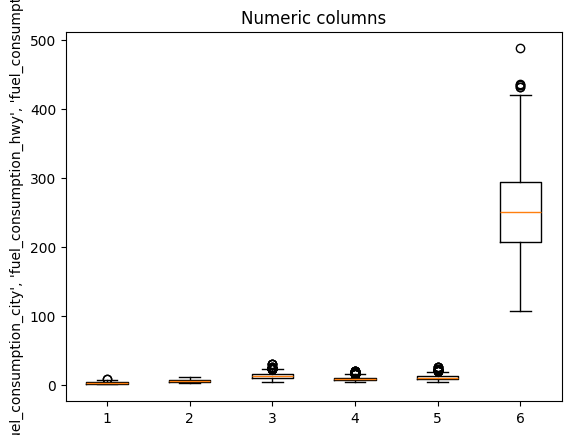

In [307]:
#Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers
#Use either the library seaborn or matplotlib
# Create a box plot for the specified column
plt.boxplot(fuel[numeric_columns])
plt.ylabel(numeric_columns)
plt.title('Numeric columns')
plt.show()

Plot them individually.

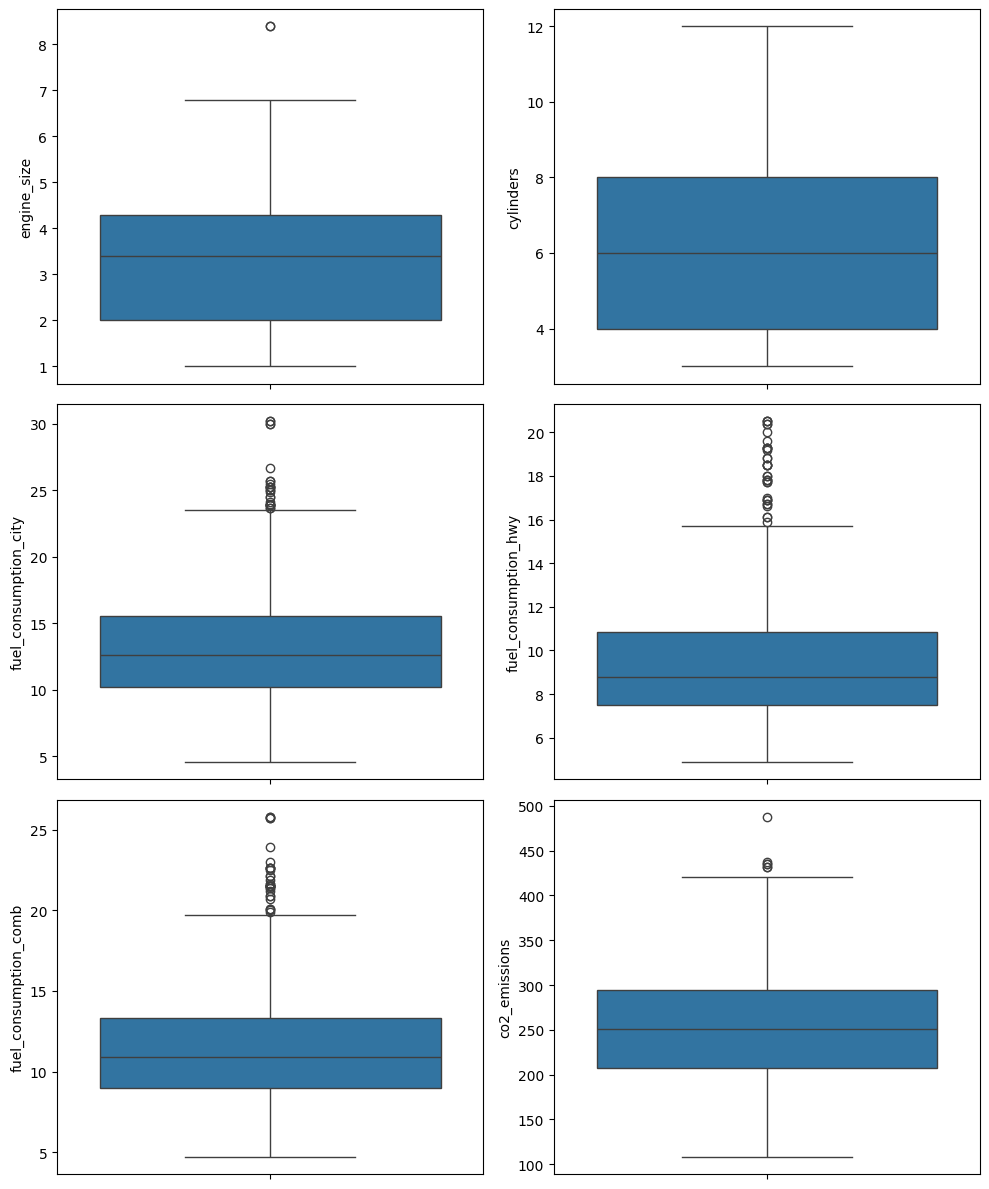

In [308]:

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Define the column names for the boxplots
columns = ["engine_size", "cylinders", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb", "co2_emissions"]

# Plot boxplots on subplots using a for loop
for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    sns.boxplot(y=col, data=fuel, ax=axes[row, col_num])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Alternatively

In [309]:
def boxplot_outliers(fuel):
    for i in fuel.columns:
        plt.boxplot(fuel[i])
        plt.title(i)
        plt.show(i)
        
        
        
        

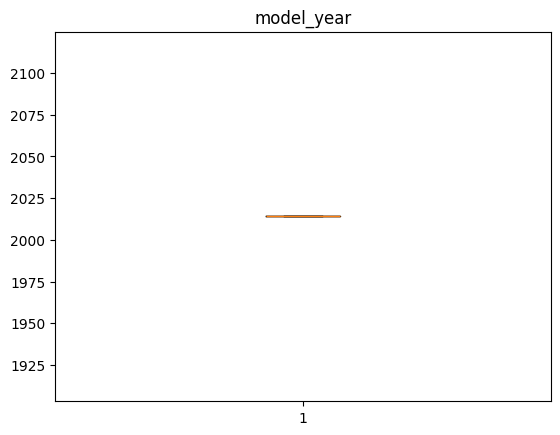

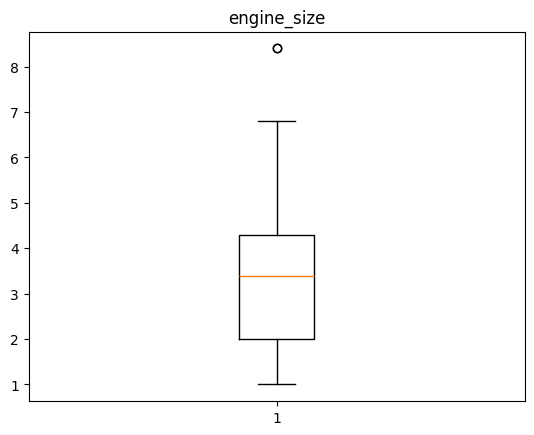

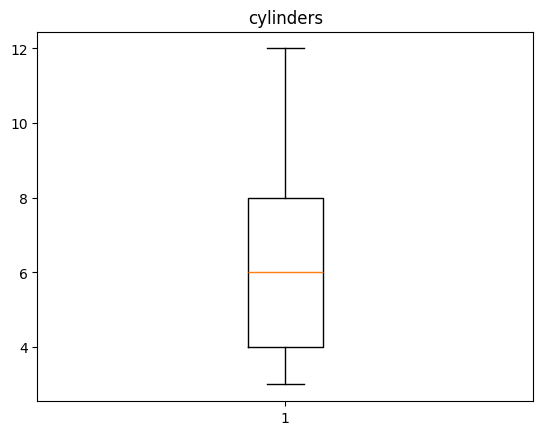

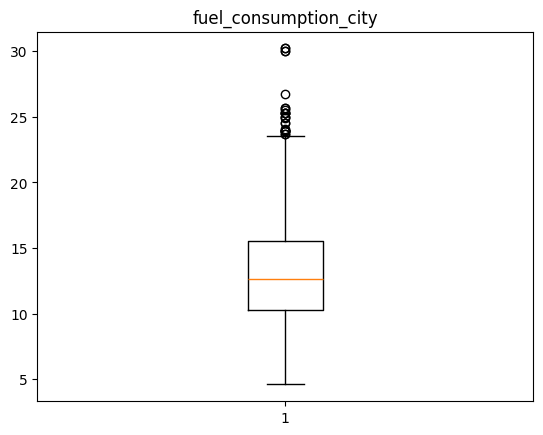

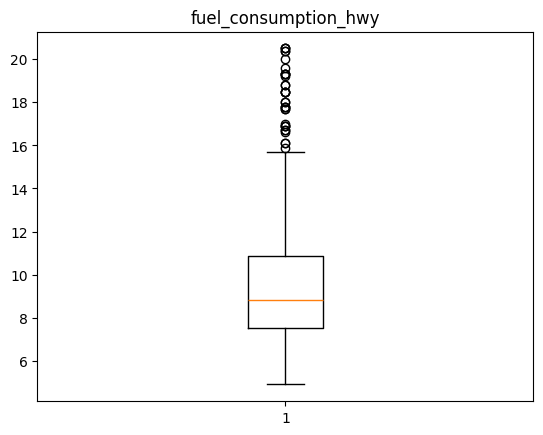

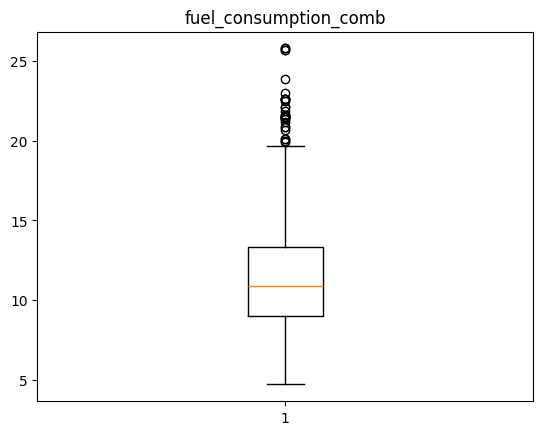

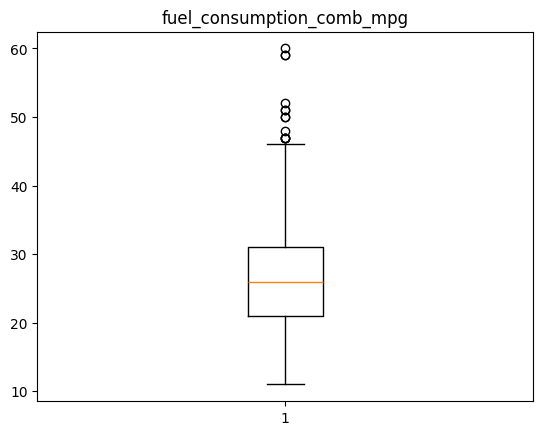

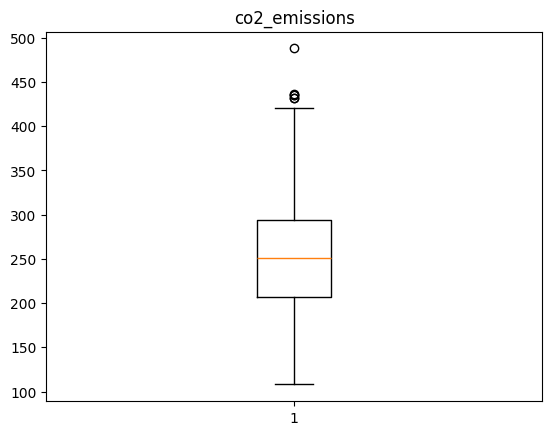

In [310]:
boxplot_outliers(continous_data)


### Cleaning the data


In [311]:
def removing_outliers(fuel):
    for i in fuel.columns:
        
        q1 = fuel[i].quantile(0.25)
        q3 = fuel[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr
        fuel[i]   = np.where(fuel[i]>upper_limit,upper_limit,fuel[i])
        fuel[i]   = np.where(fuel[i]<lower_limit,lower_limit,fuel[i])

In [312]:
removing_outliers(continous_data)

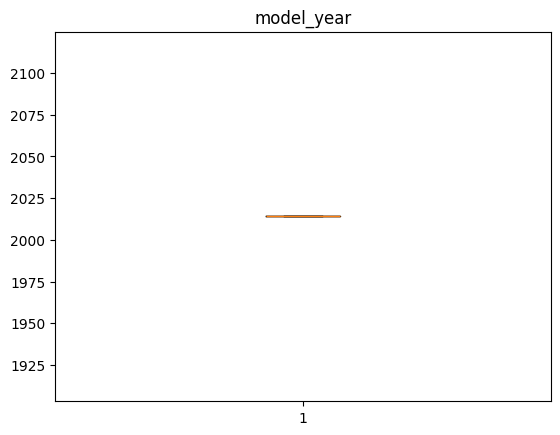

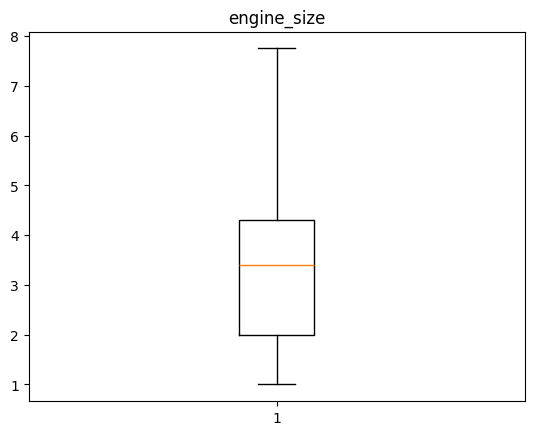

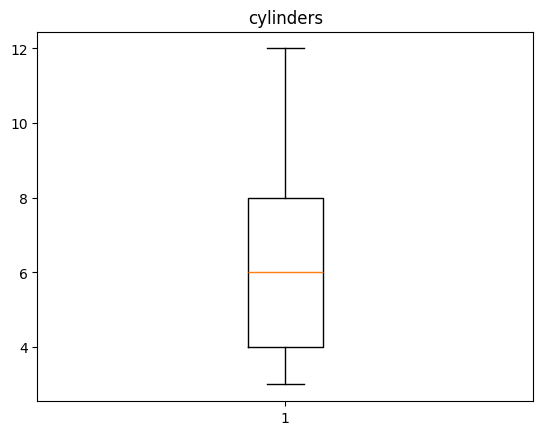

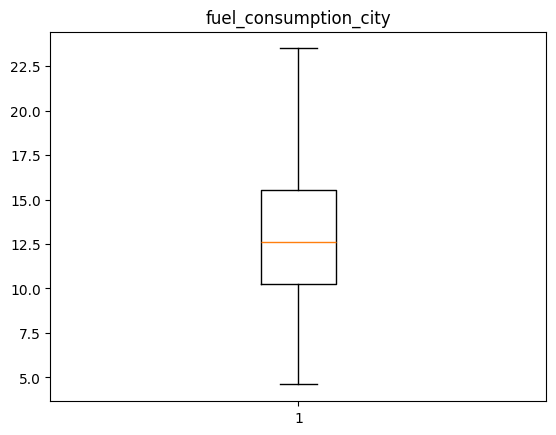

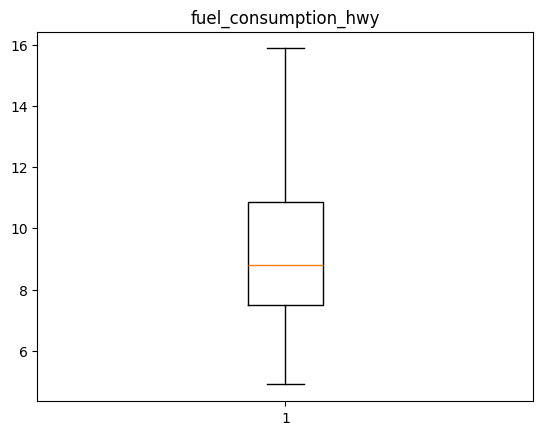

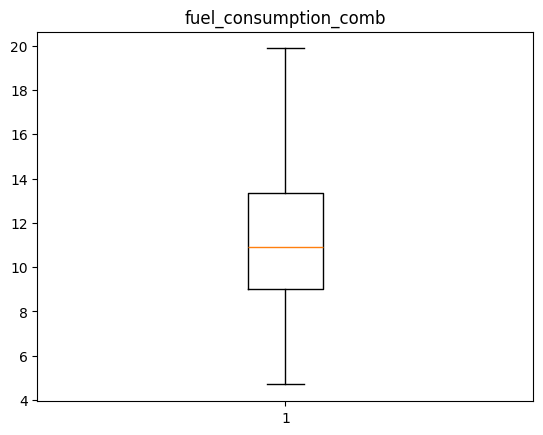

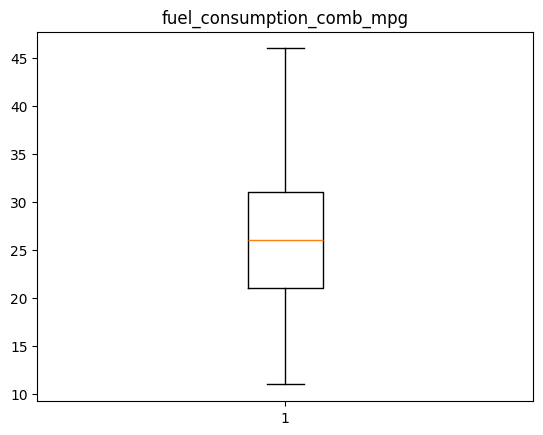

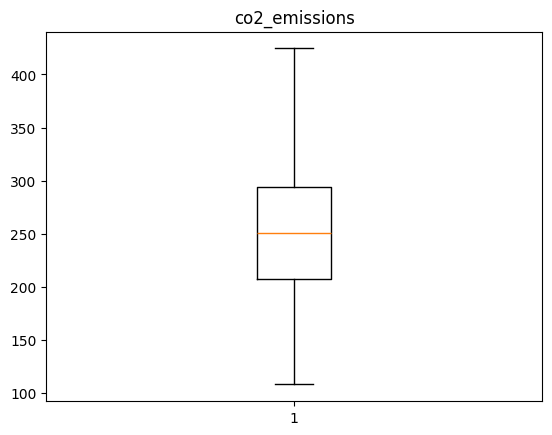

In [313]:
boxplot_outliers(continous_data)

### Separating the categorical variables

In [314]:
categorical_data = fuel.select_dtypes(include='object')

In [315]:
categorical_data.head(6)

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
5,ACURA,RLX,MID-SIZE,AS6,Z


In [316]:
continous_data.head(6)

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014.0,2.0,4.0,9.9,6.7,8.5,33.0,196.0
1,2014.0,2.4,4.0,11.2,7.7,9.6,29.0,221.0
2,2014.0,1.5,4.0,6.0,5.8,5.9,46.0,136.0
3,2014.0,3.5,6.0,12.7,9.1,11.1,25.0,255.0
4,2014.0,3.5,6.0,12.1,8.7,10.6,27.0,244.0
5,2014.0,3.5,6.0,11.9,7.7,10.0,28.0,230.0


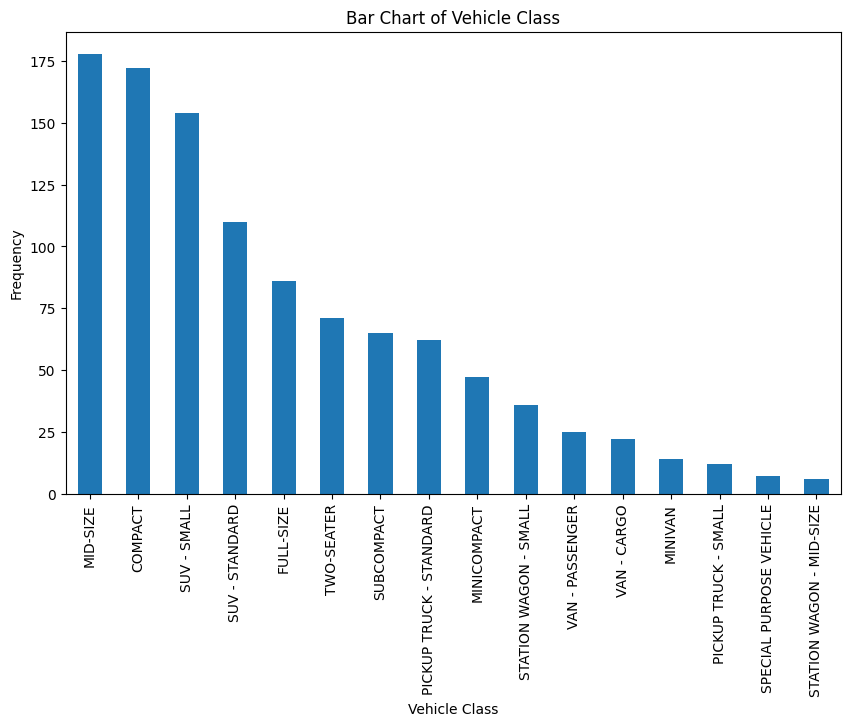

In [317]:
# Count the frequency of each category
category_counts = categorical_data['vehicle_class'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Vehicle Class')
plt.show()


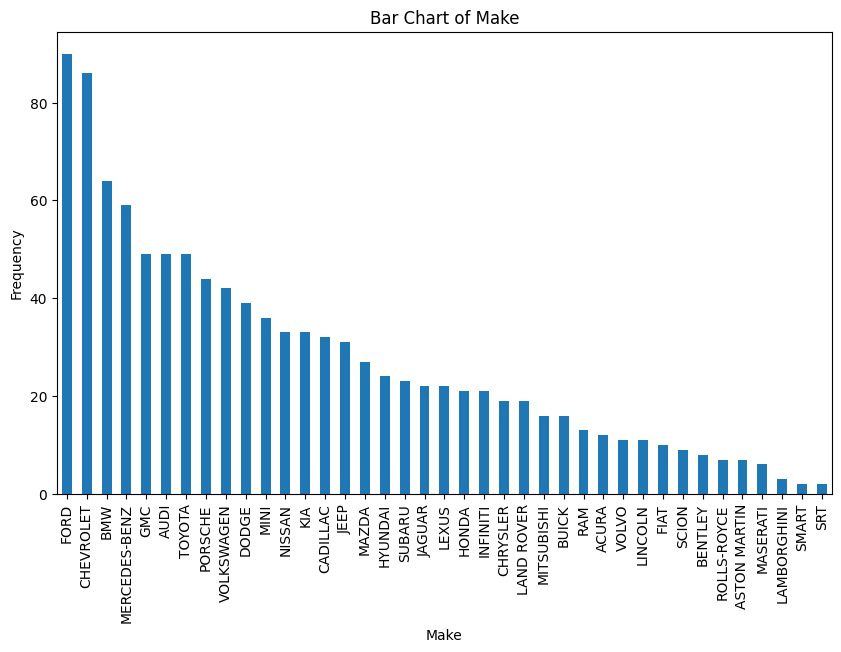

In [318]:
# Count the frequency of each category
category_counts = categorical_data['make'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Bar Chart of Make')
plt.show()

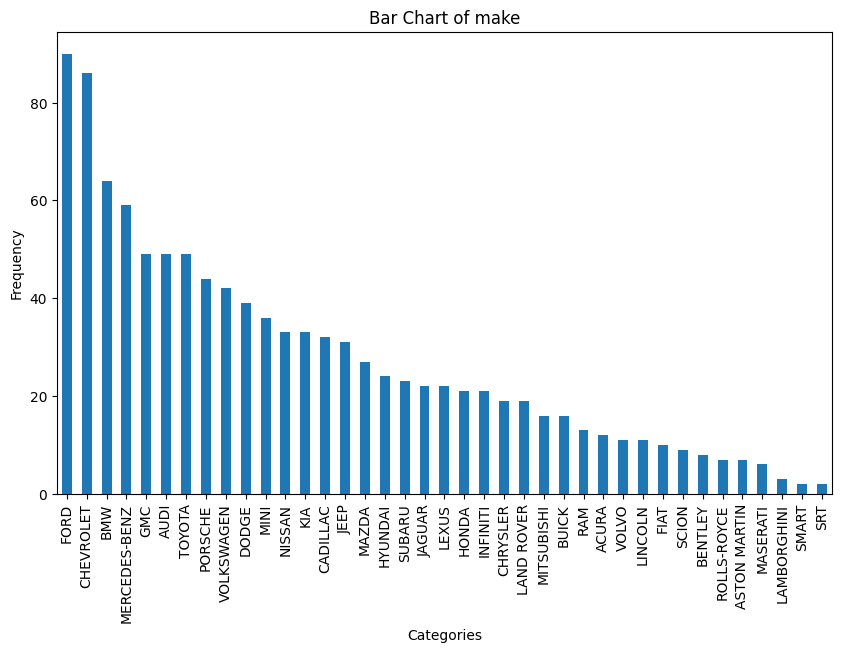

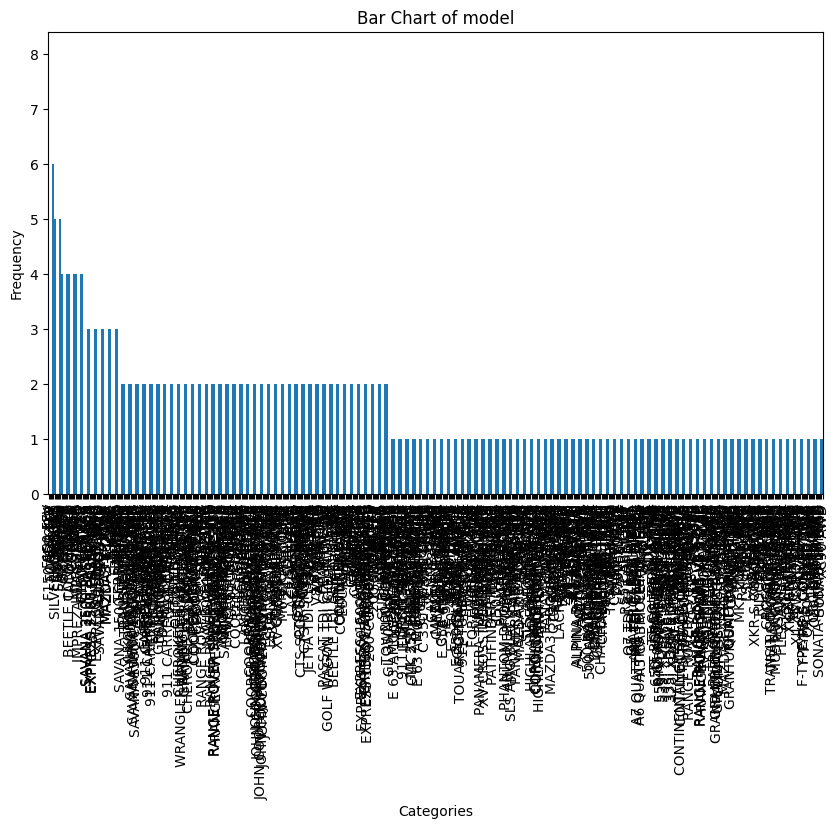

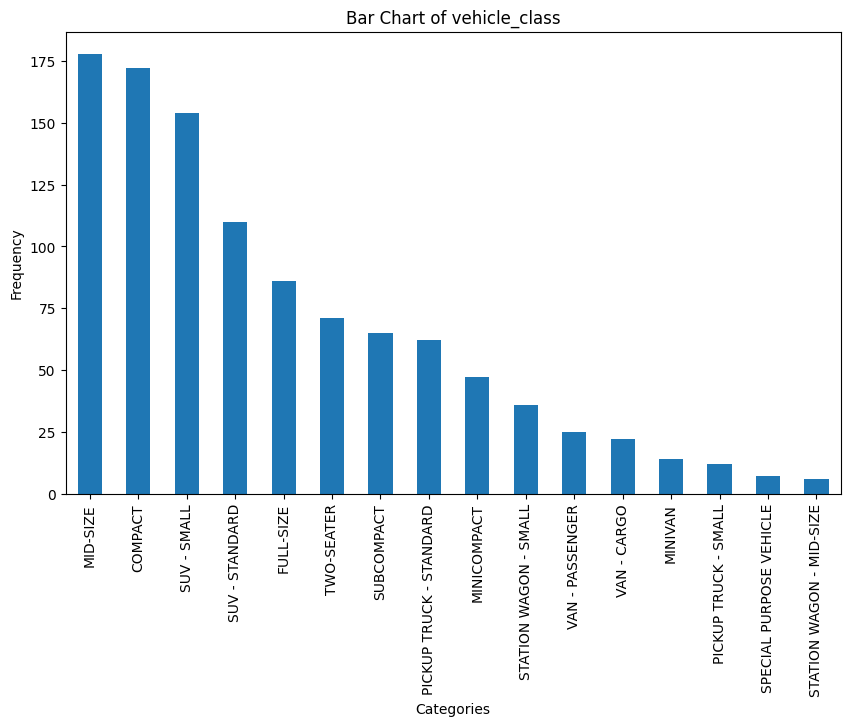

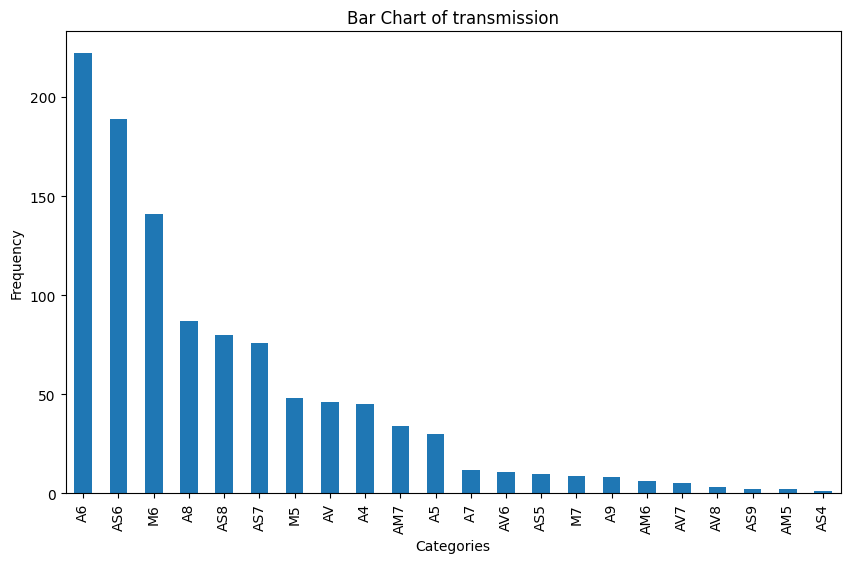

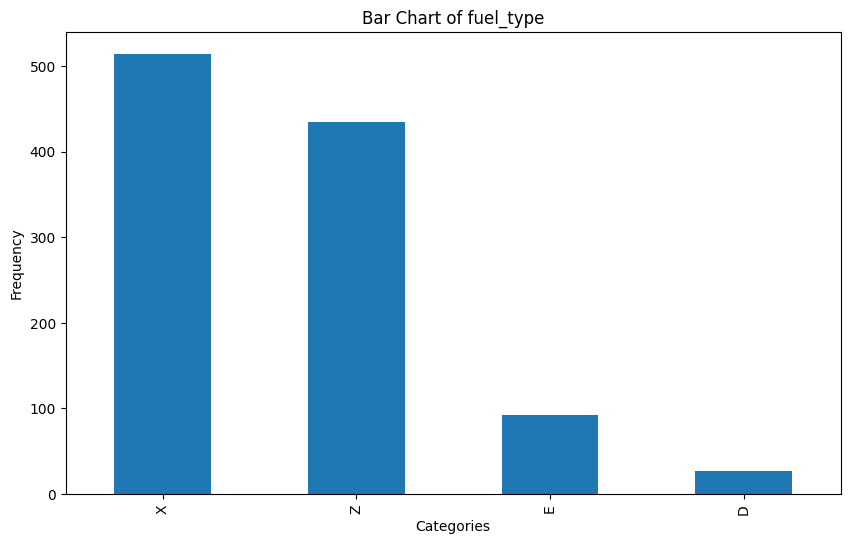

In [319]:
# Iterate over each column and create bar plots
for column in categorical_data.columns:
    # Count the frequency of each category
    category_counts = categorical_data[column].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {column}')
    plt.show()


# Exploratory Data Analysis
### Investigating Relationships

Correlation Matrix
A correlation matrix to show the correlation coefficients between the variables

In [320]:
corr_matrix = continous_data.corr()
corr_matrix

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
model_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,1.000000,0.934688,0.844391,0.806275,0.838147,-0.824122,0.875443
cylinders,NaN,0.934688,1.000000,0.811618,0.753460,0.798407,-0.784354,0.850811
fuel_consumption_city,NaN,0.844391,0.811618,1.000000,0.966474,0.995789,-0.956446,0.907352
fuel_consumption_hwy,NaN,0.806275,0.753460,0.966474,1.000000,0.985642,-0.931770,0.888116
fuel_consumption_comb,NaN,0.838147,0.798407,0.995789,0.985642,1.000000,-0.955771,0.908204
fuel_consumption_comb_mpg,NaN,-0.824122,-0.784354,-0.956446,-0.931770,-0.955771,1.000000,-0.915371
co2_emissions,NaN,0.875443,0.850811,0.907352,0.888116,0.908204,-0.915371,1.000000


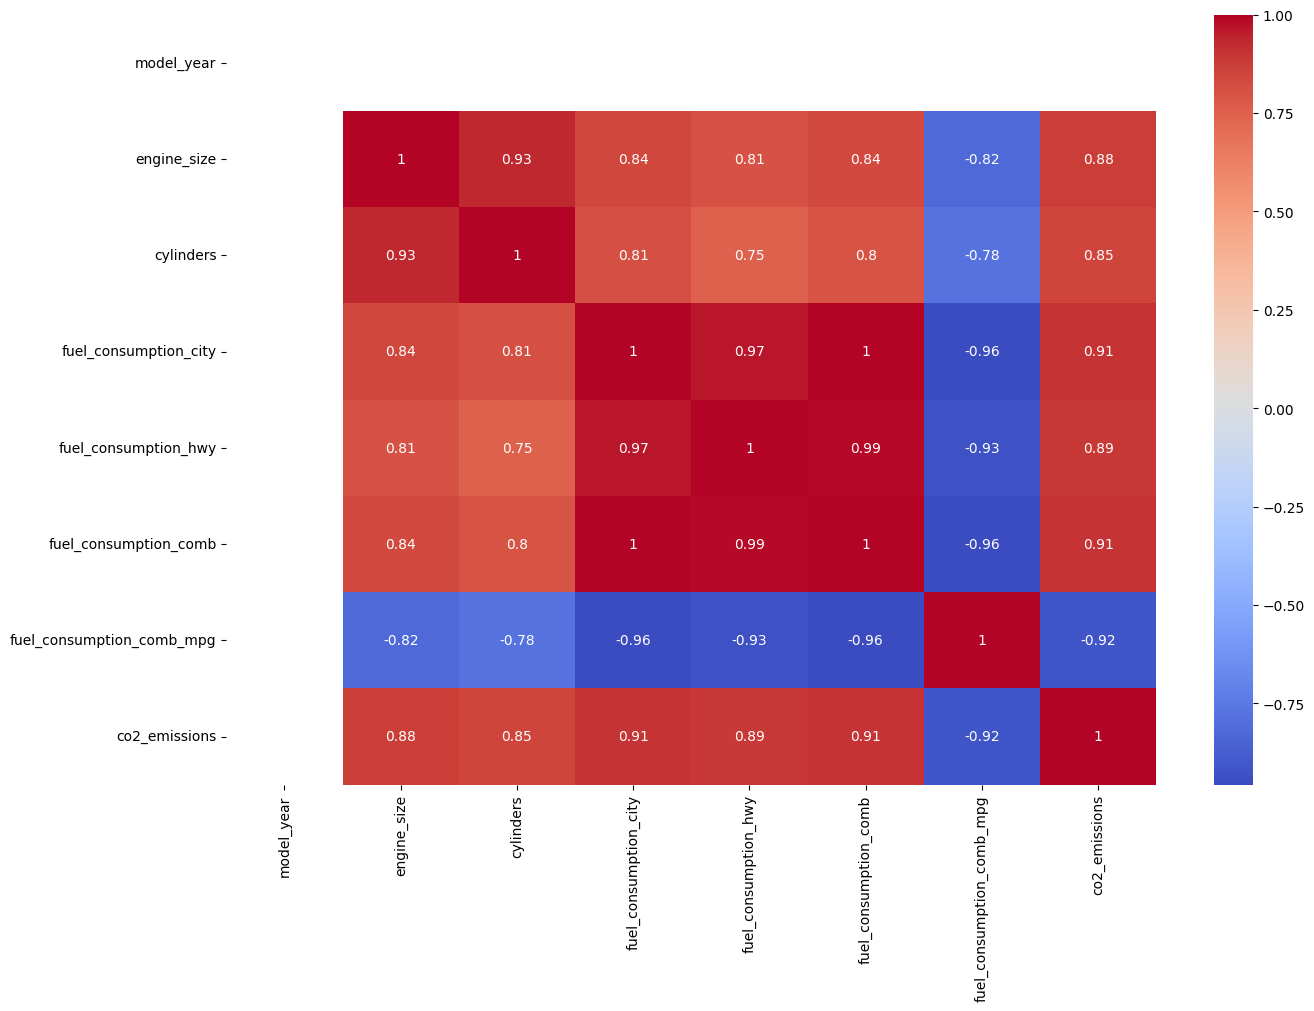

In [321]:
#Generate a heat map
# Set the plot size
plt.figure(figsize=(15, 10))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

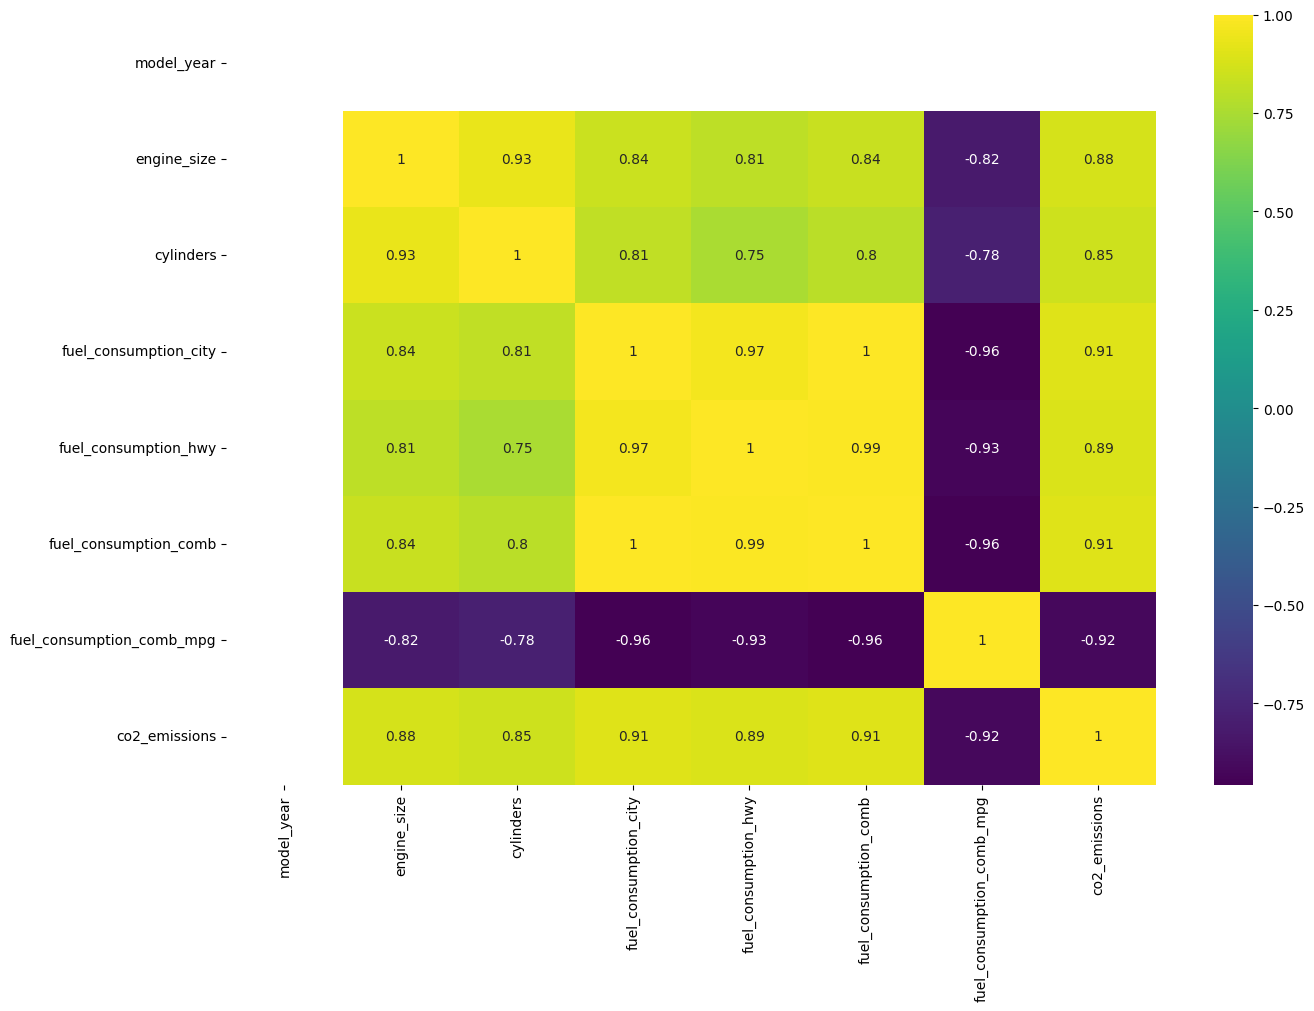

In [322]:
#Generate a heat map
# Set the plot size
plt.figure(figsize=(15, 10))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="viridis")

# Display the plot
plt.show()

### Exploring a relationship between two numeric variables

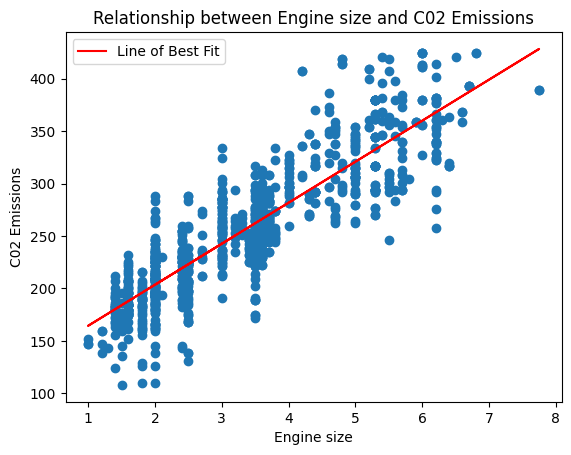

In [323]:
# Segmneting the two variables
x = continous_data['engine_size']
y = continous_data['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('Engine size')
plt.ylabel('C02 Emissions')
plt.title('Relationship between Engine size and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

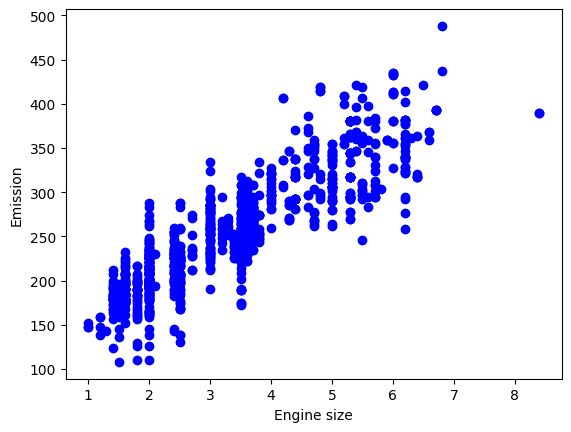

In [324]:
#plot Emission values with respect to Engine size:
plt.scatter(fuel.engine_size, fuel.co2_emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

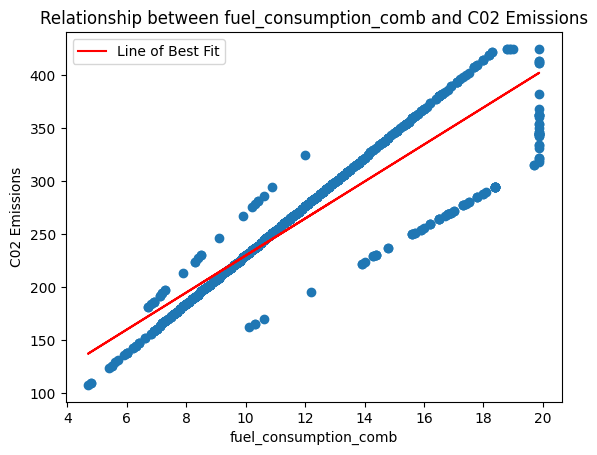

In [325]:
# Segmneting the two variables
x = continous_data['fuel_consumption_comb']
y = continous_data['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('fuel_consumption_comb')
plt.ylabel('C02 Emissions')
plt.title('Relationship between fuel_consumption_comb and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

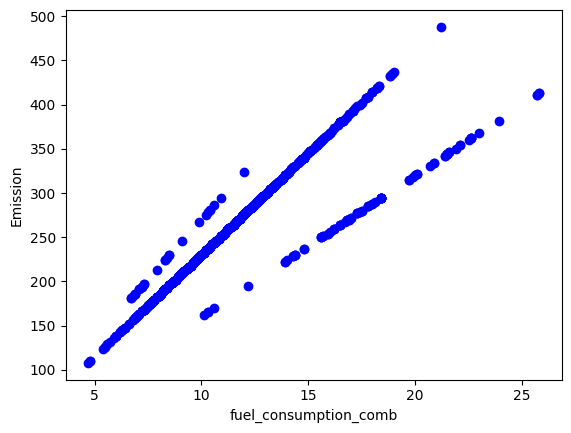

In [326]:
#plot Emission values with respect to fuel_consumption_comb:
plt.scatter(fuel.fuel_consumption_comb, fuel.co2_emissions,  color='blue')
plt.xlabel("fuel_consumption_comb")
plt.ylabel("Emission")
plt.show()

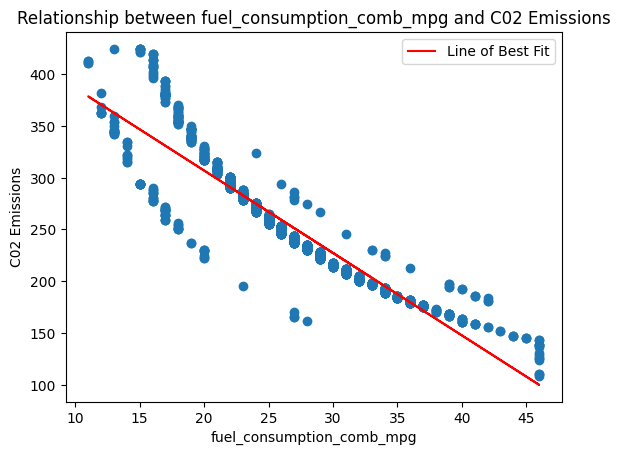

In [327]:
# Segmneting the two variables
x = continous_data['fuel_consumption_comb_mpg']
y = continous_data['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('fuel_consumption_comb_mpg')
plt.ylabel('C02 Emissions')
plt.title('Relationship between fuel_consumption_comb_mpg and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

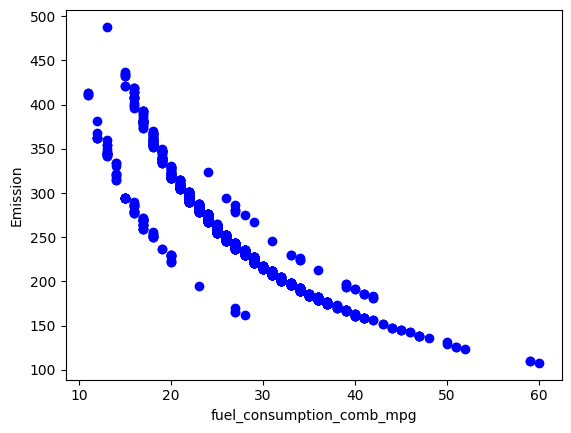

In [328]:
#plot Emission values with respect to fuel_consumption_comb_mpg:
plt.scatter(fuel.fuel_consumption_comb_mpg, fuel.co2_emissions,  color='blue')
plt.xlabel("fuel_consumption_comb_mpg")
plt.ylabel("Emission")
plt.show()

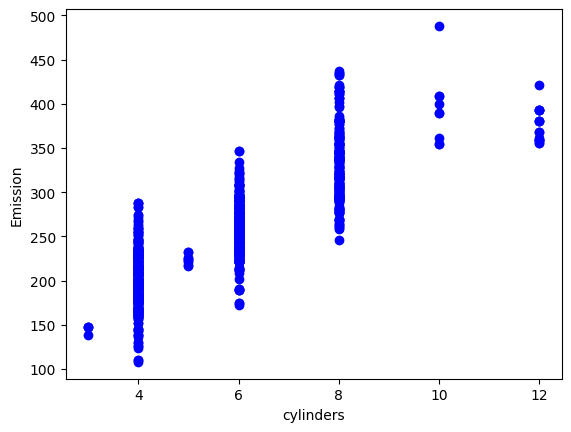

In [329]:
#plot Emission values with respect to fuel_consumption_comb_mpg:
plt.scatter(fuel.cylinders, fuel.co2_emissions,  color='blue')
plt.xlabel("cylinders")
plt.ylabel("Emission")
plt.show()

There is no variation or diversity in the x-values (cylinders) for the corresponding y-values (CO2 emissions). 
This suggests that the number of cylinders remains constant, resulting in a constant CO2 emission value.

### Observation:
There is a positive relationship between all numeric values, other than fuel_consumption_comb_mpg

## Investigating the strength of the relationship
##### A further statistical test [Pearson's correlation] to understand the magnitude of the correlation above.

In [330]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = continous_data['engine_size']
y = continous_data['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.8754432953277472
p-value: 0.0


### Observation:
   - A high linear association between the engine size and Co2 emisisons. 
   - The Pearson correlation coefficient of 0.875 shows a STRONG positive relationship. 
   - Co2 emissions tends to increase with the size of the engine.
   - With a p-value of p-value: 0.0 obtained, which is much lower than the conventional significance level of 0.05. 
   - There is a statistically significant correlation between plants harvested and the total tube weight.

In [331]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = continous_data['fuel_consumption_city']
y = continous_data['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9073521366262037
p-value: 0.0


In [332]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = continous_data['fuel_consumption_comb']
y = continous_data['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9082038663122333
p-value: 0.0


In [333]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = continous_data['fuel_consumption_comb_mpg']
y = continous_data['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: -0.9153711721215106
p-value: 0.0


In [334]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = continous_data['cylinders']
y = continous_data['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.8508109527578581
p-value: 6.972577388375757e-300


### Exploring a relationship between two categorical variables

### Chi-Squared Test for Independence

The Chi-Squared Test for Independence is a statistical method used to determine if there is a significant association between two categorical variables. It is particularly suitable for non-numeric data because it evaluates the frequency distribution of the categories. Unlike numerical data, categorical data represents distinct groups or categories that do not have inherent numerical value or order. 

The test works by comparing the observed frequencies of the categories in a contingency table with the expected frequencies, which are calculated under the assumption that the variables are independent. If the observed frequencies significantly deviate from the expected frequencies, it suggests that there is an association between the variables. 

This test is commonly used in various fields, such as social sciences, marketing, and biology, to understand relationships between categorical variables. For example, it can be used to analyze the relationship between gender and voting preference, product type and customer satisfaction, or genotype and phenotype.

The key advantages of the Chi-Squared Test for Independence are its simplicity and applicability to non-numeric data, making it a fundamental tool in the analysis of categorical data.

In [335]:
categorical_data.columns

Index(['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')

In [336]:
# make - model - vehicle_class - transmission  - fuel_type   

In [337]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(categorical_data['model'], categorical_data['transmission'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared test statistic: 17094.732695824554
p-value: 1.318252801255147e-71
Degrees of freedom: 13902
Expected frequencies:
 [[0.08434864 0.05623243 0.41611996 ... 0.08997188 0.26429241 0.01686973]
 [0.08434864 0.05623243 0.41611996 ... 0.08997188 0.26429241 0.01686973]
 [0.04217432 0.02811621 0.20805998 ... 0.04498594 0.1321462  0.00843486]
 ...
 [0.08434864 0.05623243 0.41611996 ... 0.08997188 0.26429241 0.01686973]
 [0.08434864 0.05623243 0.41611996 ... 0.08997188 0.26429241 0.01686973]
 [0.08434864 0.05623243 0.41611996 ... 0.08997188 0.26429241 0.01686973]]


In [338]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(categorical_data['vehicle_class'], categorical_data['transmission'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared test statistic: 1759.635371323918
p-value: 6.47794661024499e-199
Degrees of freedom: 315
Expected frequencies:
 [[7.25398313e+00 4.83598875e+00 3.57863168e+01 1.93439550e+00
  1.40243674e+01 1.28959700e+00 3.22399250e-01 9.67197751e-01
  5.48078725e+00 1.61199625e-01 1.61199625e+00 3.04667291e+01
  1.22511715e+01 1.28959700e+01 3.22399250e-01 7.41518276e+00
  1.77319588e+00 8.05998126e-01 4.83598875e-01 7.73758201e+00
  2.27291471e+01 1.45079663e+00]
 [3.62699157e+00 2.41799438e+00 1.78931584e+01 9.67197751e-01
  7.01218369e+00 6.44798500e-01 1.61199625e-01 4.83598875e-01
  2.74039363e+00 8.05998126e-02 8.05998126e-01 1.52333646e+01
  6.12558575e+00 6.44798500e+00 1.61199625e-01 3.70759138e+00
  8.86597938e-01 4.02999063e-01 2.41799438e-01 3.86879100e+00
  1.13645736e+01 7.25398313e-01]
 [7.50702905e+00 5.00468604e+00 3.70346767e+01 2.00187441e+00
  1.45135895e+01 1.33458294e+00 3.33645736e-01 1.00093721e+00
  5.67197751e+00 1.66822868e-01 1.66822868e+00 3.15295220e+01
  1.

In [339]:

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(categorical_data['fuel_type'], categorical_data['transmission'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared test statistic: 576.2042265967191
p-value: 5.967849543876069e-84
Degrees of freedom: 63
Expected frequencies:
 [[1.13870665e+00 7.59137769e-01 5.61761949e+00 3.03655108e-01
  2.20149953e+00 2.02436739e-01 5.06091846e-02 1.51827554e-01
  8.60356139e-01 2.53045923e-02 2.53045923e-01 4.78256795e+00
  1.92314902e+00 2.02436739e+00 5.06091846e-02 1.16401125e+00
  2.78350515e-01 1.26522962e-01 7.59137769e-02 1.21462043e+00
  3.56794752e+00 2.27741331e-01]
 [3.88003749e+00 2.58669166e+00 1.91415183e+01 1.03467666e+00
  7.50140581e+00 6.89784442e-01 1.72446111e-01 5.17338332e-01
  2.93158388e+00 8.62230553e-02 8.62230553e-01 1.62961575e+01
  6.55295220e+00 6.89784442e+00 1.72446111e-01 3.96626054e+00
  9.48453608e-01 4.31115276e-01 2.58669166e-01 4.13870665e+00
  1.21574508e+01 7.76007498e-01]
 [2.16776007e+01 1.44517338e+01 1.06942830e+02 5.78069353e+00
  4.19100281e+01 3.85379569e+00 9.63448922e-01 2.89034677e+00
  1.63786317e+01 4.81724461e-01 4.81724461e+00 9.10459231e+01
  3.6


### Exploring a relationship between one categorical and one numberic variable

ANOVA, which stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups. A one-way ANOVA uses one independent variable, while a two-way ANOVA uses two independent variables.

Alternatively


ANOVA stands for Analysis of Variance. It is a statistical method used to analyze the differences between the means of two or more groups or treatments. It is often used to determine whether there are any statistically significant differences between the means of different groups.

               sum_sq      df          F        PR(>F)
make      4682.870048    38.0  15.321534  1.083049e-75
Residual  8268.359924  1028.0        NaN           NaN


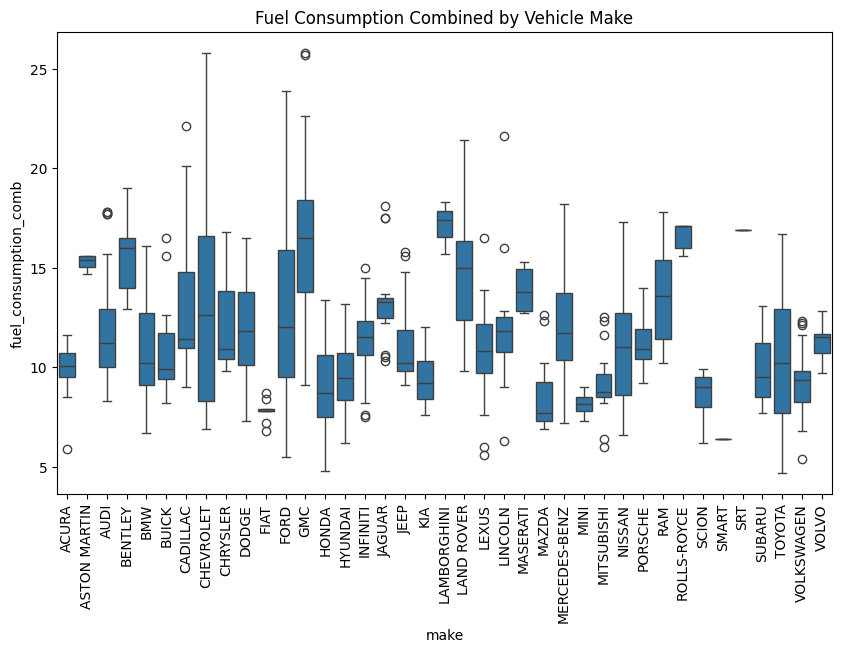

In [340]:
# Perform the ANOVA
model = ols('fuel_consumption_comb ~ make', data=fuel).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='fuel_consumption_comb', data=fuel)
plt.xticks(rotation=90)

plt.title('Fuel Consumption Combined by Vehicle Make')
plt.show()

 An ANOVA (Analysis of Variance) test determines if there are statistically significant differences in fuel consumption across different vehicle makes.

# Predictive Analysis

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'cylinders']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.7748904347438592
Mean Squared Error: 930.8157832828086


In [342]:
predictions

,Actual,Predicted
732,304,314.460306
657,221,262.966617
168,294,265.861011
86,221,248.494646
411,207,202.789745
...,...,...
963,212,202.789745
294,230,214.367322
275,232,214.367322
903,260,248.494646


In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'fuel_consumption_comb']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8685405139405122
Mean Squared Error: 543.5778099752675


In [344]:
predictions

,Actual,Predicted
732,304,298.654815
657,221,240.517041
168,294,273.255329
86,221,230.720627
411,207,205.356736
...,...,...
963,212,207.280424
294,230,222.812306
275,232,223.774150
903,260,247.071974


In [345]:
#'engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'fuel_consumption_city']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8714766559984765
Mean Squared Error: 531.437022592893


In [347]:
predictions

,Actual,Predicted
732,304,299.491512
657,221,242.467966
168,294,276.551183
86,221,234.045221
411,207,207.870271
...,...,...
963,212,205.325873
294,230,228.008963
275,232,225.464565
903,260,251.007874


In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['fuel_consumption_hwy', 'engine_size']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8527031036959104
Mean Squared Error: 609.0646381570303


## Applicability

Linear Regression is a mathematical relationship between an independent and dependent variable. The relationship is a direct proportion, relation making it the most simple relationship between the variables.
Y = mX+c
Y – Dependent Variable
X – Independent Variable
m and c are constants

In a multi-linear regression context, it could also be;
y = Ax1 +Bx2 + ... + c
Assumptions of Linear Regression :

1. The relationship between Y and X must be Linear.
2. The features must be independent of each other.
3. Homoscedasticity – The variation between the output must be constant for different input data.
4. The distribution of Y along X should be the Normal Distribution.

Linear Regression is a statistical technique of measuring the linear relationship between the two variables. 
By linear relationship, we mean that an increase in a variable would lead to increase in the other variable and a decrease in one variable would lead to attenuation in the second variable as well. Based on this linear relationship, we establish a model that predicts the future outcomes based on an increase in one variable.


In [353]:
#Creating train and test dataset
msk = np.random.rand(len(continous_data)) < 0.8
train = continous_data[msk]
test = continous_data[~msk]

Coefficients:  [[17.0188017   1.24492843  9.73068804]]
Intercept:  [70.53820024]


Text(0, 0.5, 'Emission')

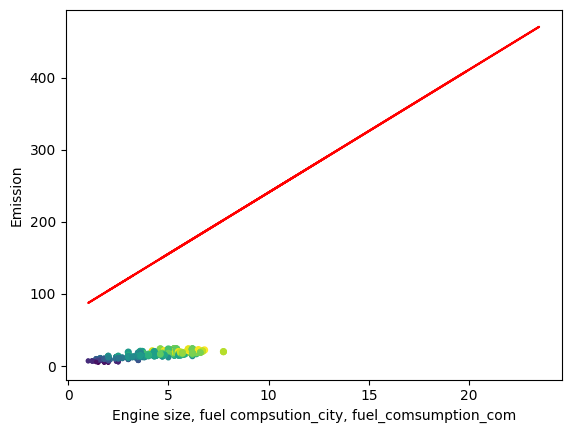

In [354]:
#Multiple Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
y = np.asanyarray(train[['co2_emissions']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)


regr.fit (x, y)
plt.scatter(train.engine_size, train.fuel_consumption_city, train.fuel_consumption_comb, train.co2_emissions)
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Engine size, fuel compsution_city, fuel_comsumption_com")
plt.ylabel("Emission")

Coefficients: The coefficients represent the estimated slopes or weights assigned to each independent variable in the multiple linear regression equation. 
Toefficients are an array: [[17.0188017   1.24492843  9.73068804]]. 
Each coefficient corresponds to one of the independent variables: engine_size, fuel_consumption_city, and fuel_consumption_comb, respectively. 
These coefficients indicate the change in the dependent variable (CO2 emissions) associated with a one-unit change in each respective independent variable, holding the other variables constant. 
For example, for every one-unit increase in engine_size, the model predicts an average increase of 17.02 units in CO2 emissions, while keeping the other variables constant.

Intercept: The intercept term represents the estimated value of the dependent variable (CO2 emissions) when all independent variables are set to zero. 
The intercept value is [70.53820024]. It indicates the baseline level of CO2 emissions when the engine size, fuel consumption in the city, and fuel consumption in the combined cycle are all zero. 

We can use the coefficients and intercept to build the multiple linear regression equation and make predictions. 

The equation would be:

#### CO2 emissions = (17.0188017 * engine_size) + (1.24492843 * fuel_consumption_city) + (9.73068804 * fuel_consumption_comb) + 70.53820024

##### All you need to do for the car manufacturing is to specify the values of the independent values, and the car manufacturing company will be able to estimate the Co2 emissions.


In [355]:
#Prediction and Evaluation

y_hat= regr.predict(test[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
x = np.asanyarray(test[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
y = np.asanyarray(test[['co2_emissions']])


# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_hat)
print('Mean Absolute Error (MAE):', mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_hat)
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared score (R2-score)
r2 = r2_score(y, y_hat)
print('R-squared score:', r2)


Mean Absolute Error (MAE): 15.718940537596911
Mean Squared Error (MSE): 510.45145680569397
R-squared score: 0.869400810498314


A lower MSE and a higher variance score indicate better predictive accuracy and a better fit of the model to the test data, respectively.

In [360]:
# Convert the predicted values (y_hat) to a DataFrame
predicted_df = pd.DataFrame(y_hat, columns=['Predicted CO2 Emissions'])

# Reset the index of the test DataFrame
test = test.reset_index(drop=True)

# Combine the actual and predicted DataFrames
result_df = pd.concat([test.co2_emissions, predicted_df], axis=1)

# Print the combined DataFrame
result_df

,co2_emissions,Predicted CO2 Emissions
0,255.0,253.925234
1,244.0,248.312933
2,212.0,214.101896
3,239.0,246.366796
4,359.0,345.156575
...,...,...
188,192.0,183.747609
189,184.0,180.703910
190,246.0,223.259828
191,264.0,253.334333


In [361]:
length_actual = len(test)
length_predicted = len(predicted_df)

print("Length of actual values:", length_actual)
print("Length of predicted values:", length_predicted)


Length of actual values: 193
Length of predicted values: 193


### R-squared Score
The R-squared score of 0.869 indicates the proportion of the variance in the dependent variable (CO2 emissions) that can be explained by the independent variables (engine size, fuel consumption city, and fuel consumption combined) used in the multiple regression model. This value ranges between 0 and 1, with 1 indicating a perfect fit.

An R-squared score of 0.869 suggests that approximately 86.9% of the variance in CO2 emissions can be explained by the independent variables included in your model. This indicates a reasonably good fit of the model to the data. It means that the model has a high explanatory power regarding the relationship between the independent variables and CO2 emissions.

### Mean Squared Error (MSE)
MSE measures the average squared difference between the predicted values and the actual values. A lower MSE value indicates that the model's predictions are closer to the actual values, minimizing the squared errors.

The MSE value of 510.45 is a measure of the average squared difference between the predicted CO2 emissions and the actual CO2 emissions. While this value is not as low as possible, it still indicates that the model performs reasonably well, although there might be room for improvement.

### Mean Absolute Error (MAE)
MAE measures the average absolute difference between the predicted values and the actual values. A lower MAE value suggests that the model's predictions are very close to the actual values, minimizing the absolute errors.

The MAE value of 15.72 indicates that, on average, the predicted CO2 emissions deviate from the actual CO2 emissions by about 15.72 units. MAE is less sensitive to outliers compared to MSE, providing a more straightforward interpretation of the prediction errors.


Overall, these metrics suggest that your multiple regression model is performing reasonably well in predicting CO2 emissions based on the given independent variables

In [362]:
fuel

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [363]:
# Specify the make you want to filter
our_make = 'VOLVO'

# Filter the dataframe based on the specified make
fuel_volvo = fuel[fuel['make'] == our_make]


In [367]:
fuel_volvo

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1056,2014,VOLVO,S60,COMPACT,2.5,5,AS6,X,11.3,7.8,9.7,29,223
1057,2014,VOLVO,S60 AWD,COMPACT,2.5,5,AS6,X,11.6,8.3,10.1,28,232
1058,2014,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [368]:
###OR
#Filter the dataframe based on the specified make
fuel_volvo1 = fuel[fuel['make'] == 'VOLVO']
fuel_volvo1

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1056,2014,VOLVO,S60,COMPACT,2.5,5,AS6,X,11.3,7.8,9.7,29,223
1057,2014,VOLVO,S60 AWD,COMPACT,2.5,5,AS6,X,11.6,8.3,10.1,28,232
1058,2014,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [369]:
###OR
#Filter the dataframe based on the specified make
Acura = fuel[fuel['make'] == 'ACURA']
Acura

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212
